# Pymaceuticals Inc.
---

### Analysis

- It is my analysis that the size of tumors compared to the weight of the mouse are highly correlated.  Furthermore, in the case studies of Capomulin, there was significant shrinkage in tumor size the longer the drug treatment was administered.  Capomulin and Ramicane produced the better results when calculating every central tendency.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "/Users/lucasludwig/Desktop/Homework/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/lucasludwig/Desktop/Homework/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID
combined_data.loc[combined_data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(["g989"]) == False]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_data.groupby("Drug Regimen")
mean = drug_group["Tumor Volume (mm3)"].mean()
median = drug_group["Tumor Volume (mm3)"].median()
variance = drug_group["Tumor Volume (mm3)"].var()
std = drug_group["Tumor Volume (mm3)"].std()
sem = drug_group["Tumor Volume (mm3)"].sem()
summary_table = pd.DataFrame({"Tumor Volume Mean": mean, "Tumor Volume Median": median, "Tumor Volume Variance": variance, "Tumor Volume Standard Deviation": std, "Tumor Volume SEM": sem})
summary_table



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
drug_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

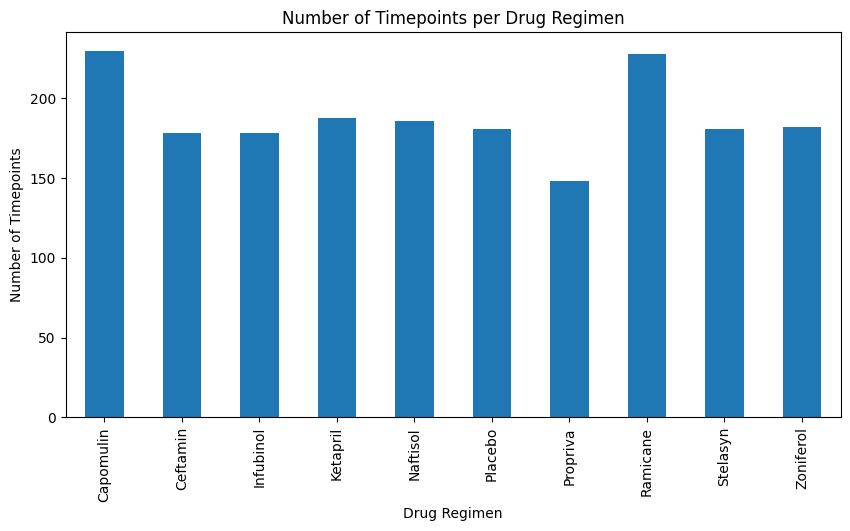

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_group["Timepoint"].count().plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints per Drug Regimen")
plt.show()


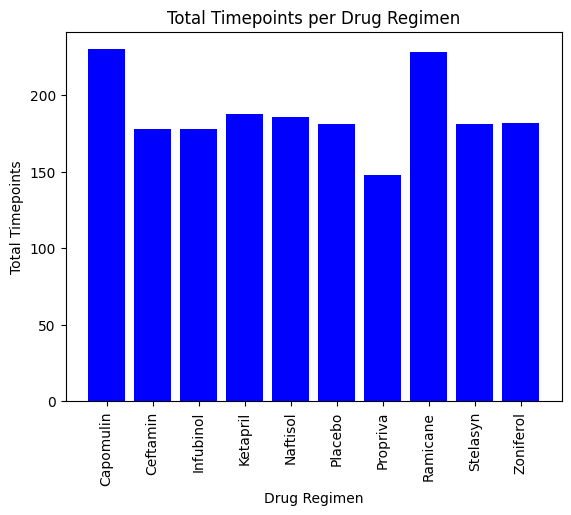

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = summary_table.index.unique()
total_timepoints = (drug_group["Timepoint"].count())
ax = plt.bar(drug_regimen, total_timepoints, color="b", align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.title("Total Timepoints per Drug Regimen")
plt.show()



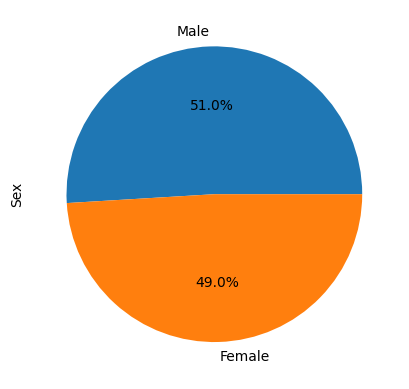

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_data['Sex'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

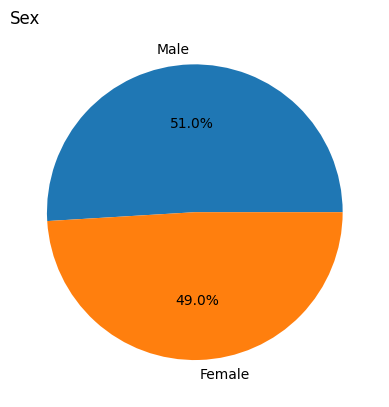

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_data['Sex'].value_counts()
labels = ['Male', 'Female']
plt.pie(sex, labels=labels, autopct="%1.1f%%")
plt.title('Sex', loc='left', pad=0)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = clean_data.groupby(["Drug Regimen", "Mouse ID"]).agg(Tumor_Volume=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
final_tumor_volume = final_tumor_volume.reset_index()
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor_volume = final_tumor_volume.set_index("Drug Regimen")
final_tumor_volume.head()



,Mouse ID,Tumor_Volume
Drug Regimen,,
Capomulin,b128,38.982878
Capomulin,b742,38.939633
Capomulin,f966,30.485985
Capomulin,g288,37.074024
Capomulin,g316,40.159220


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[drug, "Tumor_Volume"]
    
    # add subset
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

    

Capomulin's potential outliers: Series([], Name: Tumor_Volume, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor_Volume, dtype: float64)
Infubinol's potential outliers: Drug Regimen
Infubinol    36.321346
Name: Tumor_Volume, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor_Volume, dtype: float64)


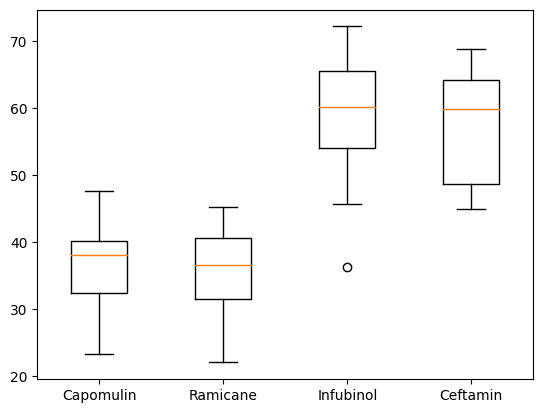

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.show()



## Line and Scatter Plots

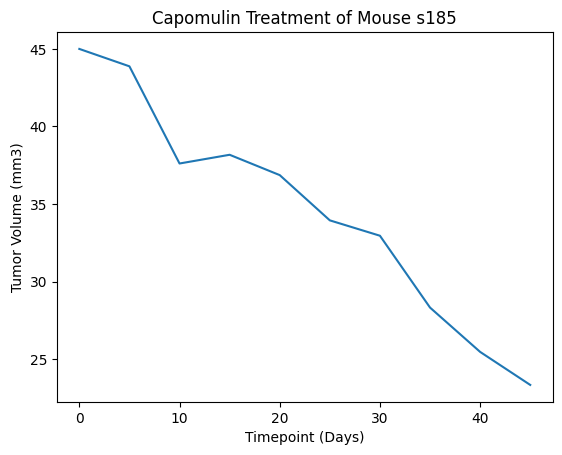

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show()



/var/folders/vk/4zznpqds6r3d053j58lwq6nh0000gn/T/ipykernel_27657/2273260440.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()


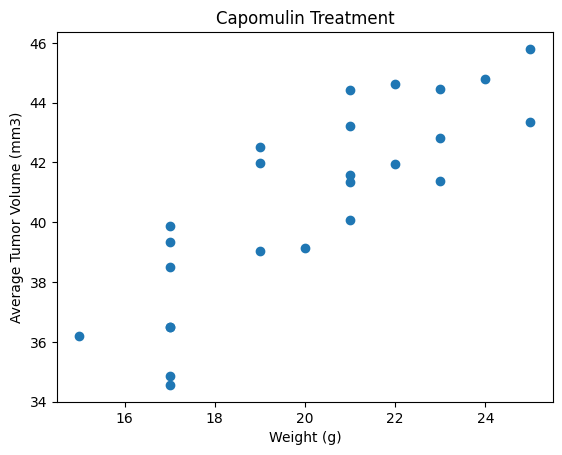

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


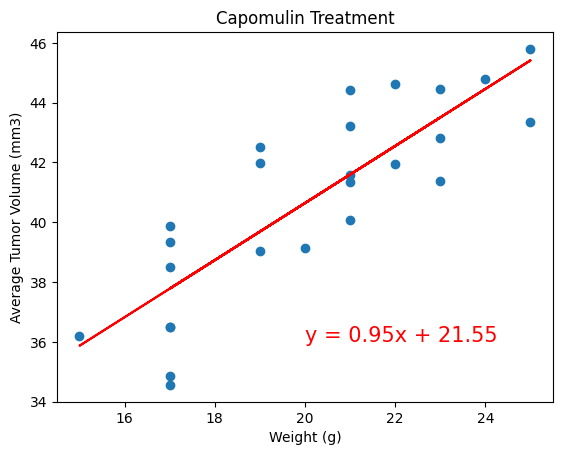

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
regress_values = capomulin_avg["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(capomulin_avg["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()